In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


# Load dataset MNIST

In [2]:
data = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = data.load_data()
n, h, w = X_train.shape
X_train, X_test = X_train / 255, X_test / 255
print(f"test shape: {X_test.shape}")
print(f"train shape: {X_train.shape}")

11490434/11490434 [==============================] - 0s 0us/step
test shape: (10000, 28, 28)
train shape: (60000, 28, 28)


number is 8


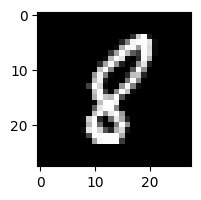

In [3]:
plt.figure(figsize=(2, 2))
rand = np.random.randint(n)
plt.imshow(X_train[rand], cmap="gray");
print(f"number is {y_train[rand]}")

## Build the ANN model

In [73]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [74]:
model.compile(
  optimizer="adam",
  loss="sparse_categorical_crossentropy",
  metrics=["accuracy"]
)

In [75]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3313 - accuracy: 0.9040 - val_loss: 0.1520 - val_accuracy: 0.9560
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1697 - accuracy: 0.9495 - val_loss: 0.1149 - val_accuracy: 0.9676
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1319 - accuracy: 0.9598 - val_loss: 0.0916 - val_accuracy: 0.9722
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1119 - accuracy: 0.9658 - val_loss: 0.0785 - val_accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0978 - accuracy: 0.9700 - val_loss: 0.0742 - val_accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0868 - accuracy: 0.9728 - val_loss: 0.0769 - val_accuracy: 0.9746
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0818 - accuracy: 0.9745 - val_loss: 0.0745 - val_accuracy:

In [76]:
model.evaluate(X_train, y_train), model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0709 - accuracy: 0.9765


([0.027289897203445435, 0.9919833540916443],
 [0.0709376335144043, 0.9764999747276306])

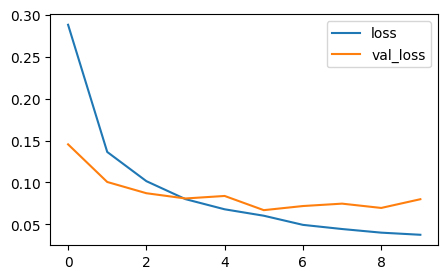

In [8]:
plt.figure(figsize=(5, 3))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend();

In [9]:
model.predict(X_test[0:1]).sum() # because of softmax activation function

1/1 [==============================] - 0s 353ms/step


1.0

313/313 [==============================] - 1s 2ms/step


<Figure size 1000x1000 with 0 Axes>

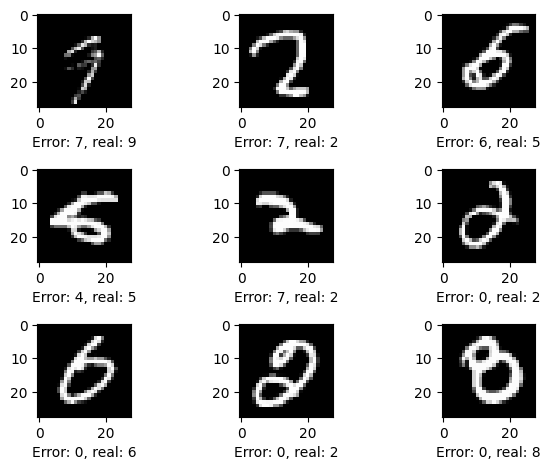

In [41]:
y_pred = model.predict(X_test)
fail_index = np.where(y_pred.argmax(axis=1) != y_test)[0]
fail = X_test[fail_index]

plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(3, 3)

for i in range(3):
  for j in range(3):
    rand = np.random.randint(fail.shape[0])
    axes[i, j].imshow(fail[rand], cmap="gray")
    index = fail_index[rand]
    axes[i, j].set_xlabel(f"Error: {y_pred[index].argmax()}, real: {y_test[index]}")
plt.tight_layout();

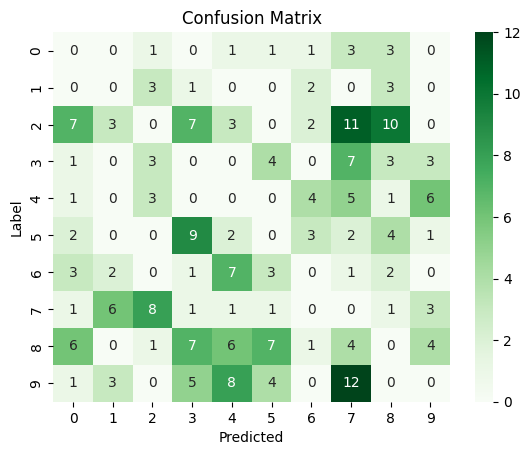

In [72]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred.argmax(axis=1))
np.fill_diagonal(conf_mat, 0)
sns.heatmap(conf_mat, cmap="Greens", annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Label");